In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.svm import SVC

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("pulsar_data.csv")

In [3]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [4]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [6]:
df.columns=['mean_ip','std_dev_ip','excess_kurtosis_ip','skewness_ip','mean_dmsnr','std_dev_dmsnr','excess_kurtosis_dmsnr','skewness_dmsnr','target_class']

In [7]:
df.head()

,mean_ip,std_dev_ip,excess_kurtosis_ip,skewness_ip,mean_dmsnr,std_dev_dmsnr,excess_kurtosis_dmsnr,skewness_dmsnr,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [8]:
df['target_class'].unique()

array([0., 1.])

In [9]:
count0=len(df[df['target_class']==0.0])

In [10]:
count1=len(df[df['target_class']==1.0])

In [11]:
count0perc = count0*100/(count0+count1)
count0perc

90.79661558109834

In [12]:
count1perc = count1*100/(count0+count1)
count1perc

9.20338441890166

In [13]:
df.isnull().sum()

mean_ip                     0
std_dev_ip                  0
excess_kurtosis_ip       1735
skewness_ip                 0
mean_dmsnr                  0
std_dev_dmsnr            1178
excess_kurtosis_dmsnr       0
skewness_dmsnr            625
target_class                0
dtype: int64

In [14]:
df['excess_kurtosis_ip'].fillna(df['excess_kurtosis_ip'].median())

0        0.375485
1        0.712898
2        0.133408
3       -0.215989
4        0.825013
           ...   
12523   -0.012418
12524    0.218177
12525    0.663456
12526   -0.089940
12527    0.346178
Name: excess_kurtosis_ip, Length: 12528, dtype: float64

In [15]:
df.isnull().sum()

mean_ip                     0
std_dev_ip                  0
excess_kurtosis_ip       1735
skewness_ip                 0
mean_dmsnr                  0
std_dev_dmsnr            1178
excess_kurtosis_dmsnr       0
skewness_dmsnr            625
target_class                0
dtype: int64

In [16]:
df['excess_kurtosis_ip']=df['excess_kurtosis_ip'].fillna(df['excess_kurtosis_ip'].median())

In [17]:
df['std_dev_dmsnr']=df['std_dev_dmsnr'].fillna(df['std_dev_dmsnr'].median())

In [18]:
df['skewness_dmsnr']=df['skewness_dmsnr'].fillna(df['skewness_dmsnr'].median())

In [19]:
df.isnull().sum()

mean_ip                  0
std_dev_ip               0
excess_kurtosis_ip       0
skewness_ip              0
mean_dmsnr               0
std_dev_dmsnr            0
excess_kurtosis_dmsnr    0
skewness_dmsnr           0
target_class             0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mean_ip                12528 non-null  float64
 1   std_dev_ip             12528 non-null  float64
 2   excess_kurtosis_ip     12528 non-null  float64
 3   skewness_ip            12528 non-null  float64
 4   mean_dmsnr             12528 non-null  float64
 5   std_dev_dmsnr          12528 non-null  float64
 6   excess_kurtosis_dmsnr  12528 non-null  float64
 7   skewness_dmsnr         12528 non-null  float64
 8   target_class           12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [21]:
df.describe()

,mean_ip,std_dev_ip,excess_kurtosis_ip,skewness_ip,mean_dmsnr,std_dev_dmsnr,excess_kurtosis_dmsnr,skewness_dmsnr,target_class
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,111.041841,46.521437,0.443251,1.778431,12.674758,25.604827,8.333489,104.408308,0.092034
std,25.672828,6.801077,0.992144,6.208450,29.613230,18.809291,4.535783,104.799639,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.057820,-0.188142,1.910535,14.761144,5.803063,38.128424,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.421239,0.932374,5.413253,26.473142,10.727927,135.774973,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


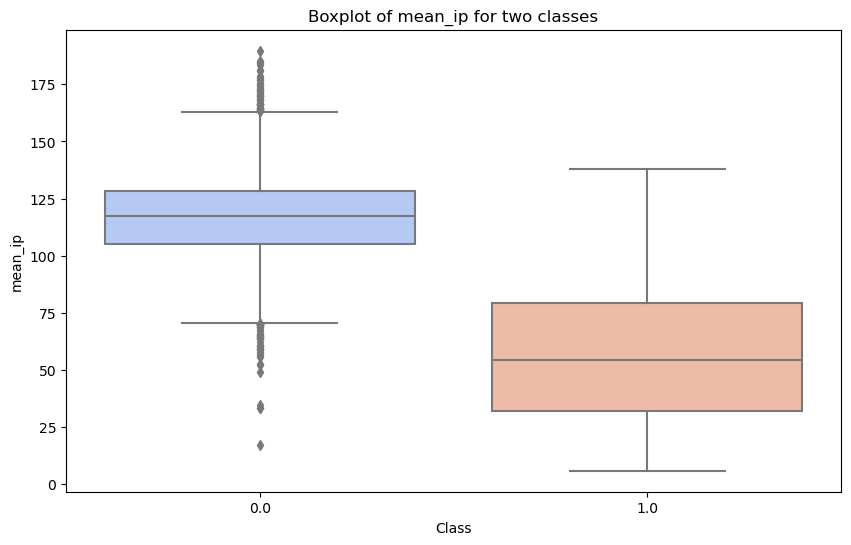

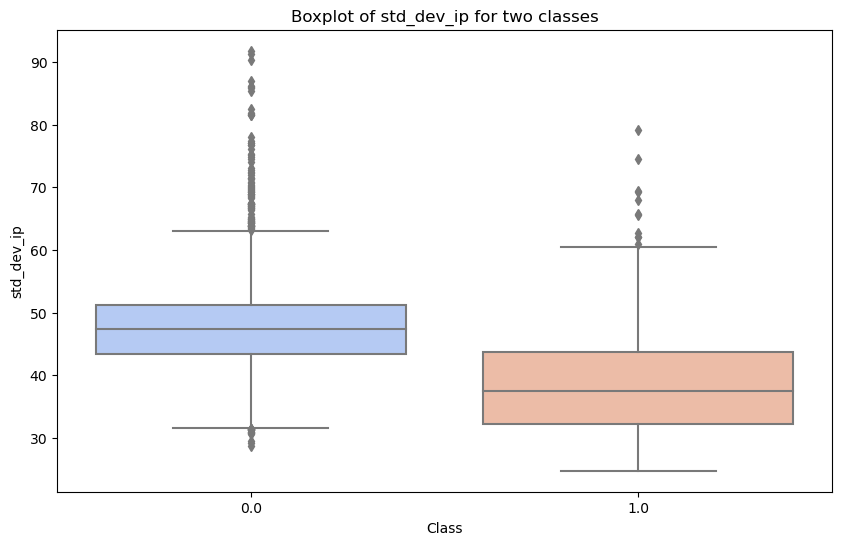

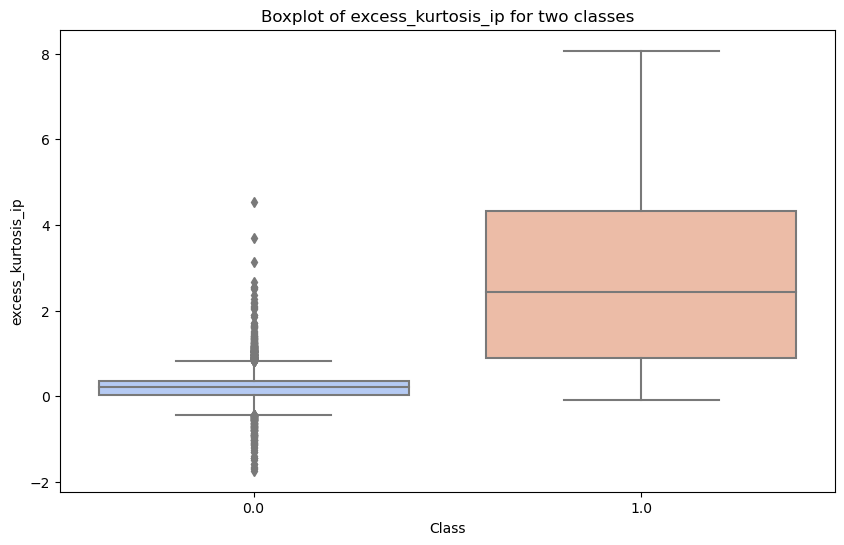

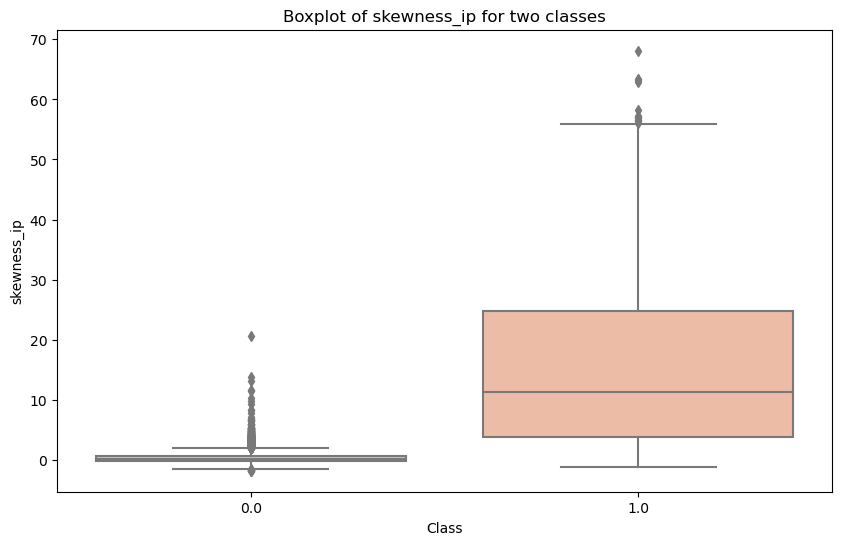

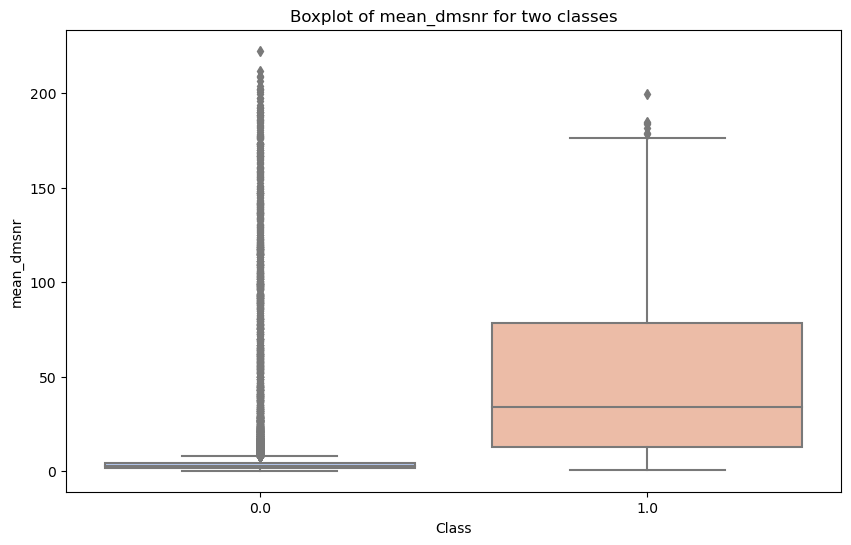

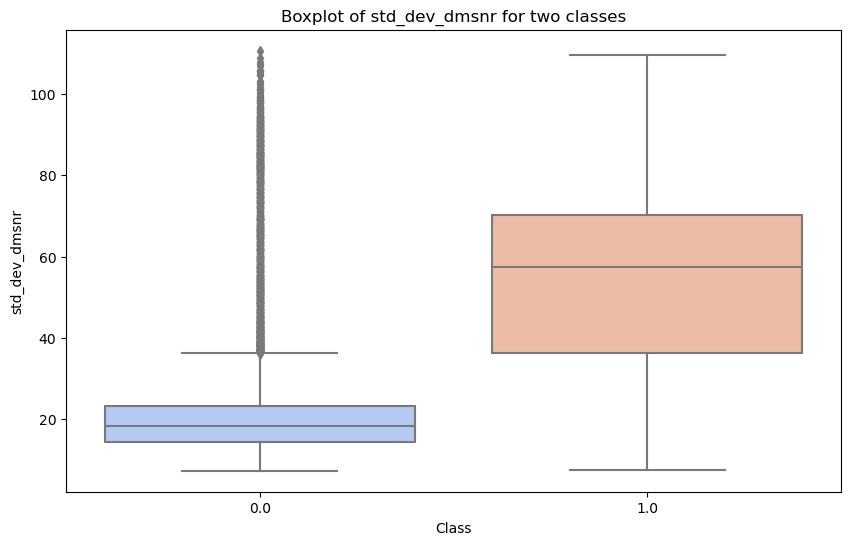

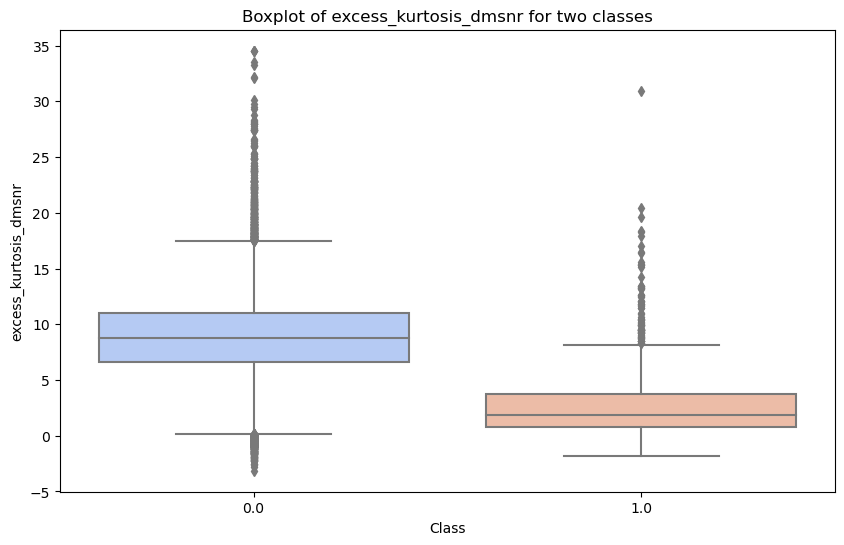

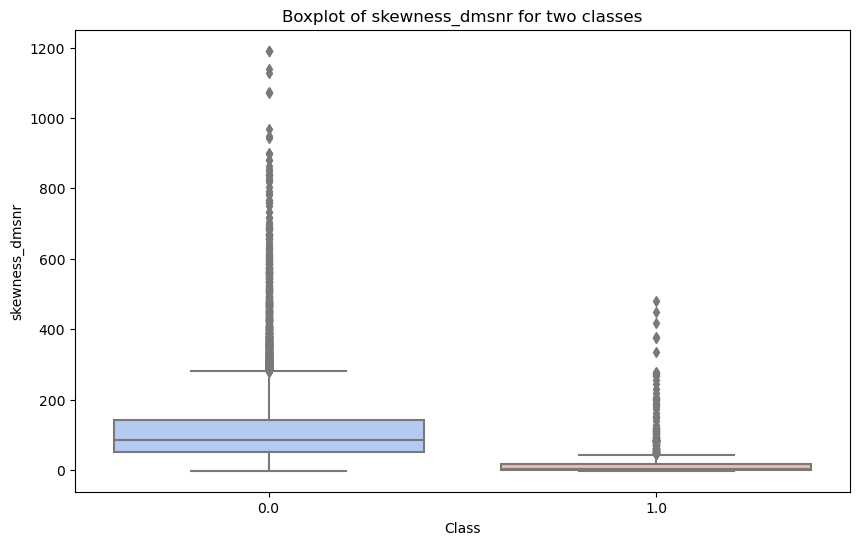

In [22]:
for column in df.columns[:-1]:  # Exclude the 'Class' column
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['target_class'], y=column, data=df, palette="coolwarm")
    plt.title(f'Boxplot of {column} for two classes')
    plt.xlabel('Class')
    plt.ylabel(column)
    plt.show()

In [23]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [24]:
X=df.iloc[:,:-1]
y=df['target_class']

In [25]:
len(X)

12528

In [26]:
len(y)

12528

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Default:

In [28]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [29]:
y_pred=svc.predict(X_test)

In [30]:
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy is {acc}")

Accuracy is 0.9702539298669891


In [31]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[3735  111]
 [  12  277]]


<AxesSubplot:>

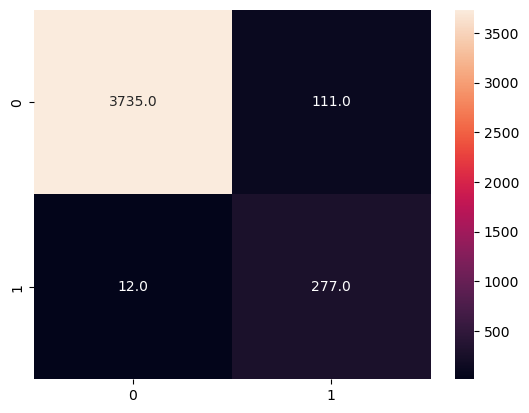

In [32]:
sns.heatmap(cm,annot=True, fmt=".1f")

In [33]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      3747
         1.0       0.96      0.71      0.82       388

    accuracy                           0.97      4135
   macro avg       0.96      0.86      0.90      4135
weighted avg       0.97      0.97      0.97      4135



## rbf kernel and C=1.0 and gamma=auto

In [34]:
svcrbf1auto=SVC(kernel='rbf',C=1.0,gamma='auto')

In [35]:
svcrbf1auto.fit(X_train,y_train)

SVC(gamma='auto')

In [36]:
y_pred=svcrbf1auto.predict(X_test)

In [37]:
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy is {acc}")

Accuracy is 0.9064087061668682


In [38]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[3747  387]
 [   0    1]]


<AxesSubplot:>

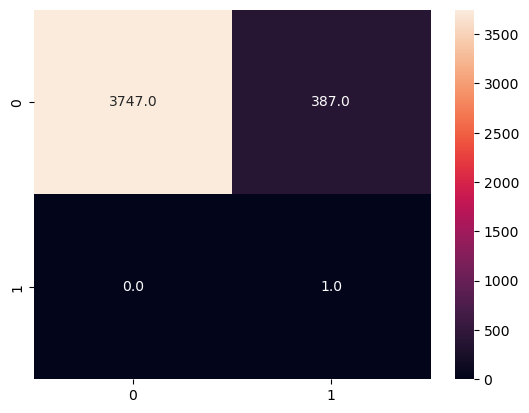

In [39]:
sns.heatmap(cm,annot=True, fmt=".1f")

In [40]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      3747
         1.0       1.00      0.00      0.01       388

    accuracy                           0.91      4135
   macro avg       0.95      0.50      0.48      4135
weighted avg       0.92      0.91      0.86      4135



## rbf kernel and C=10.0 

In [41]:
svcrbf10=SVC(kernel='rbf',C=10.0)

In [42]:
svcrbf10.fit(X_train,y_train)

SVC(C=10.0)

In [43]:
y_pred=svcrbf10.predict(X_test)

In [44]:
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy is {acc}")

Accuracy is 0.9726723095525998


In [45]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[3736  102]
 [  11  286]]


<AxesSubplot:>

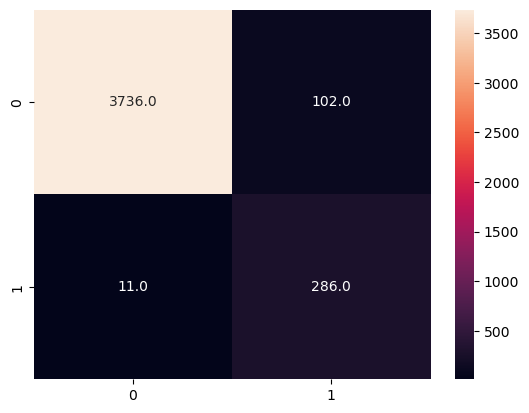

In [46]:
sns.heatmap(cm,annot=True, fmt=".1f")

In [47]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      3747
         1.0       0.96      0.74      0.84       388

    accuracy                           0.97      4135
   macro avg       0.97      0.87      0.91      4135
weighted avg       0.97      0.97      0.97      4135



## rbf kernel and C=20.0 

In [48]:
svcrbf20=SVC(kernel='rbf',C=20.0)

In [49]:
svcrbf20.fit(X_train,y_train)

SVC(C=20.0)

In [50]:
y_pred=svcrbf20.predict(X_test)

In [51]:
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy is {acc}")

Accuracy is 0.9743651753325272


In [52]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[3736   95]
 [  11  293]]


<AxesSubplot:>

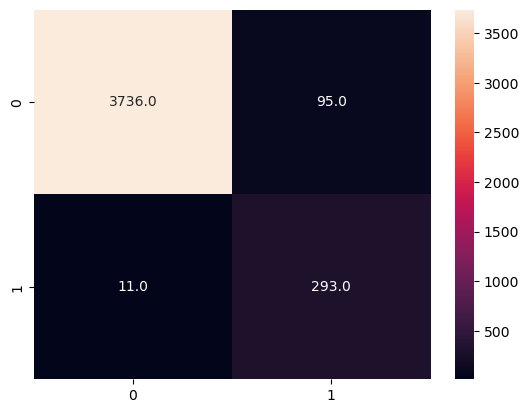

In [53]:
sns.heatmap(cm,annot=True, fmt=".1f")

In [54]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3747
         1.0       0.96      0.76      0.85       388

    accuracy                           0.97      4135
   macro avg       0.97      0.88      0.92      4135
weighted avg       0.97      0.97      0.97      4135



## Linear kernel and C=1.0 

In [55]:
svclinear1=SVC(kernel='linear',C=1.0)

In [56]:
svclinear1.fit(X_train,y_train)

SVC(kernel='linear')

In [57]:
y_pred=svclinear1.predict(X_test)

In [58]:
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy is {acc}")

Accuracy is 0.9750906892382104


In [59]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[3737   93]
 [  10  295]]


<AxesSubplot:>

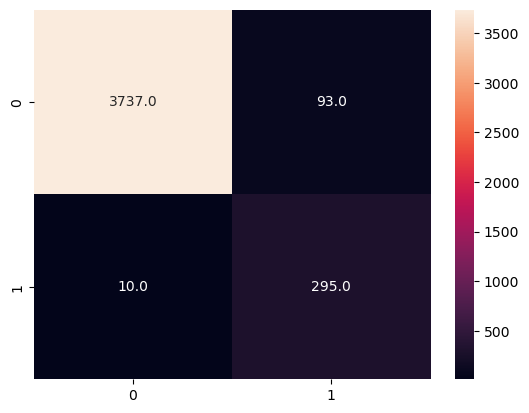

In [60]:
sns.heatmap(cm,annot=True, fmt=".1f")

In [61]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3747
         1.0       0.97      0.76      0.85       388

    accuracy                           0.98      4135
   macro avg       0.97      0.88      0.92      4135
weighted avg       0.97      0.98      0.97      4135



## Linear kernel and C=10.0 

In [62]:
svclinear10=SVC(kernel='linear',C=10.0)

In [63]:
svclinear10.fit(X_train,y_train)

SVC(C=10.0, kernel='linear')

In [64]:
y_pred=svclinear10.predict(X_test)

In [65]:
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy is {acc}")

Accuracy is 0.9750906892382104


In [66]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[3738   94]
 [   9  294]]


<AxesSubplot:>

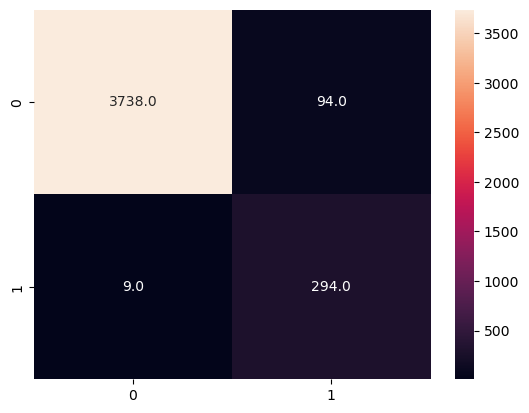

In [67]:
sns.heatmap(cm,annot=True, fmt=".1f")

In [68]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3747
         1.0       0.97      0.76      0.85       388

    accuracy                           0.98      4135
   macro avg       0.97      0.88      0.92      4135
weighted avg       0.97      0.98      0.97      4135



## Linear kernel and C=20.0 

In [69]:
svclinear20=SVC(kernel='linear',C=20.0)

In [70]:
svclinear20.fit(X_train,y_train)

SVC(C=20.0, kernel='linear')

In [71]:
y_pred=svclinear20.predict(X_test)

In [72]:
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy is {acc}")

Accuracy is 0.9753325272067714


In [73]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[3738   93]
 [   9  295]]


<AxesSubplot:>

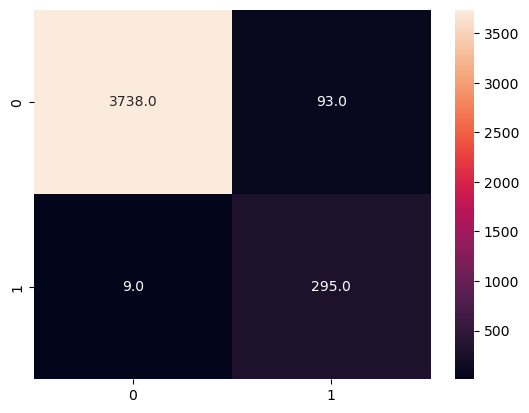

In [74]:
sns.heatmap(cm,annot=True, fmt=".1f")

In [75]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3747
         1.0       0.97      0.76      0.85       388

    accuracy                           0.98      4135
   macro avg       0.97      0.88      0.92      4135
weighted avg       0.98      0.98      0.97      4135



## Polynomial kernel and C=1.0 

In [76]:
svcpoly1=SVC(kernel='poly',C=1.0)

In [77]:
svcpoly1.fit(X_train,y_train)

SVC(kernel='poly')

In [78]:
y_pred=svcpoly1.predict(X_test)

In [79]:
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy is {acc}")

Accuracy is 0.9704957678355501


In [80]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[3728  103]
 [  19  285]]


<AxesSubplot:>

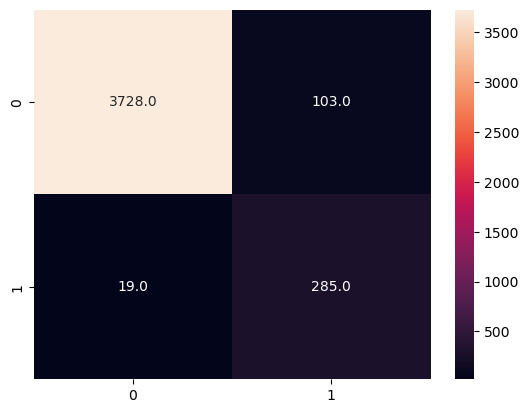

In [81]:
sns.heatmap(cm,annot=True, fmt=".1f")

In [82]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      3747
         1.0       0.94      0.73      0.82       388

    accuracy                           0.97      4135
   macro avg       0.96      0.86      0.90      4135
weighted avg       0.97      0.97      0.97      4135



## Polynomial kernel and C=10.0 

In [83]:
svcpoly10=SVC(kernel='poly',C=100.0)

In [84]:
svcpoly10.fit(X_train,y_train)

SVC(C=100.0, kernel='poly')

In [85]:
y_pred=svcpoly10.predict(X_test)

In [86]:
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy is {acc}")

Accuracy is 0.9753325272067714


In [87]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[3733   88]
 [  14  300]]


<AxesSubplot:>

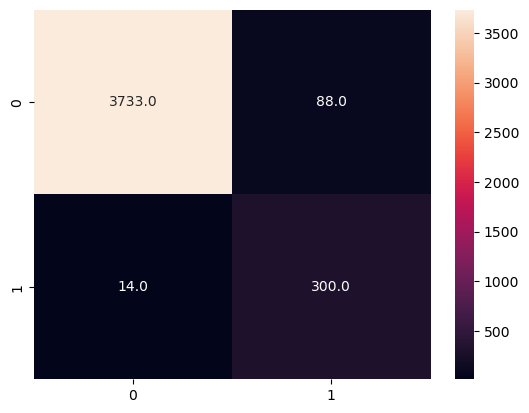

In [88]:
sns.heatmap(cm,annot=True, fmt=".1f")

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3747
         1.0       0.96      0.77      0.85       388

    accuracy                           0.98      4135
   macro avg       0.97      0.88      0.92      4135
weighted avg       0.97      0.98      0.97      4135



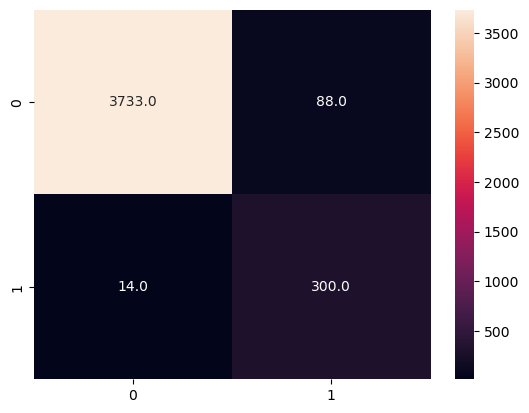

In [89]:
report = classification_report(y_test, y_pred)
print(report)

## Polynomial kernel and C=20.0 

In [90]:
svcpoly20=SVC(kernel='poly',C=20.0)

In [91]:
svcpoly20.fit(X_train,y_train)

SVC(C=20.0, kernel='poly')

In [92]:
y_pred=svcpoly20.predict(X_test)

In [93]:
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy is {acc}")

Accuracy is 0.9714631197097945


In [94]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[3733  104]
 [  14  284]]


<AxesSubplot:>

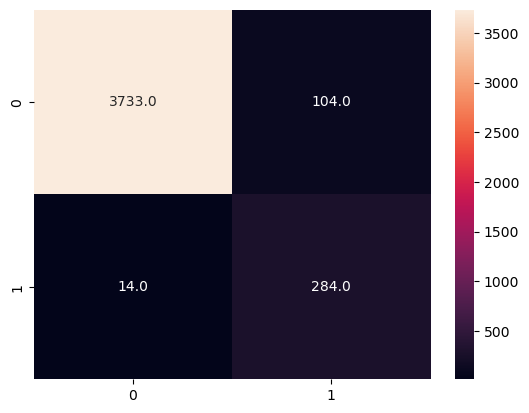

In [95]:
sns.heatmap(cm,annot=True, fmt=".1f")

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      3747
         1.0       0.95      0.73      0.83       388

    accuracy                           0.97      4135
   macro avg       0.96      0.86      0.91      4135
weighted avg       0.97      0.97      0.97      4135



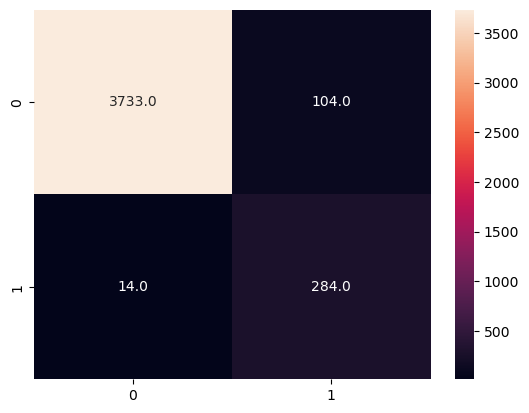

In [97]:
report = classification_report(y_test, y_pred)
print(report)

## Sigmoid kernel and C=1.0 

In [98]:
svcsigmoid1=SVC(kernel='sigmoid',C=1.0)

In [99]:
svcsigmoid1.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [100]:
y_pred=svcsigmoid1.predict(X_test)

In [101]:
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy is {acc}")

Accuracy is 0.9110036275695285


In [102]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[3583  204]
 [ 164  184]]


<AxesSubplot:>

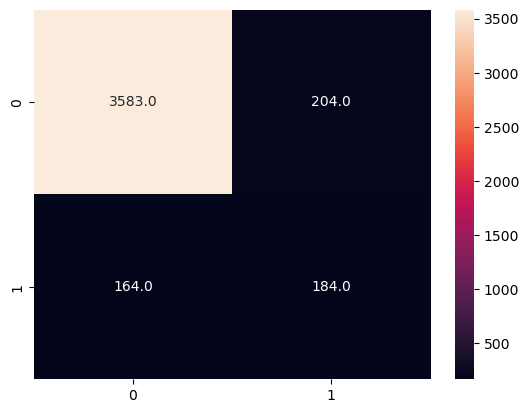

In [103]:
sns.heatmap(cm,annot=True, fmt=".1f")

In [104]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      3747
         1.0       0.53      0.47      0.50       388

    accuracy                           0.91      4135
   macro avg       0.74      0.72      0.73      4135
weighted avg       0.91      0.91      0.91      4135



## Sigmoid kernel and C=10.0 

In [105]:
svcsigmoid10=SVC(kernel='sigmoid',C=10.0)

In [106]:
svcsigmoid10.fit(X_train,y_train)

SVC(C=10.0, kernel='sigmoid')

In [107]:
y_pred=svcsigmoid10.predict(X_test)

In [108]:
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy is {acc}")

Accuracy is 0.9068923821039904


In [109]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[3564  202]
 [ 183  186]]


<AxesSubplot:>

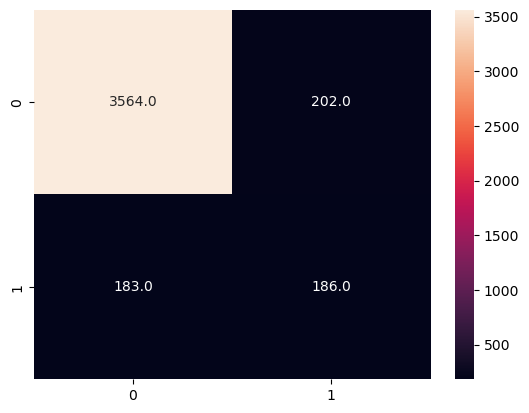

In [110]:
sns.heatmap(cm,annot=True, fmt=".1f")

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      3747
         1.0       0.50      0.48      0.49       388

    accuracy                           0.91      4135
   macro avg       0.73      0.72      0.72      4135
weighted avg       0.90      0.91      0.91      4135



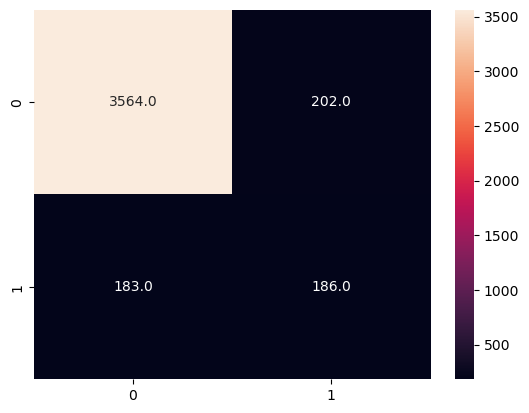

In [112]:
report = classification_report(y_test, y_pred)
print(report)

## Sigmoid kernel and C=20.0 

In [113]:
svcsigmoid20=SVC(kernel='sigmoid',C=20.0)

In [114]:
svcsigmoid20.fit(X_train,y_train)

SVC(C=20.0, kernel='sigmoid')

In [115]:
y_pred=svcsigmoid20.predict(X_test)

In [116]:
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy is {acc}")

Accuracy is 0.9066505441354292


In [117]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[3563  202]
 [ 184  186]]


<AxesSubplot:>

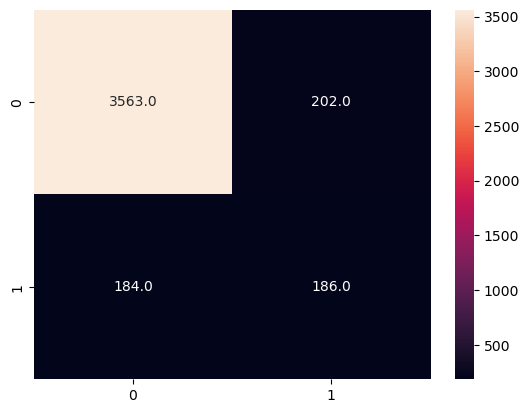

In [118]:
sns.heatmap(cm,annot=True, fmt=".1f")

In [119]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      3747
         1.0       0.50      0.48      0.49       388

    accuracy                           0.91      4135
   macro avg       0.72      0.72      0.72      4135
weighted avg       0.90      0.91      0.91      4135

